In [2]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import datetime
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
def extract_folder(folderpath, add_scores=False, downsample=None):
    """
    Extract CSV data from folder and subfolders into a dataframe.

    Args:
      folderpath (str): Path to the folder containing CSV files.
      add_scores (bool, optional): Boolean to add scores.csv to the dataframe. Defaults to False.
      downsample (int, optional): Number of rows to downsample CSVs to. Defaults to None.

    Returns:
      pandas.DataFrame: DataFrame of concatenated CSV data.
    """
    import os
    import pandas as pd
    
    # Dict to store dataframes by condition  
    dfs = {'control': [], 'condition': []}

    try:
        # Handle top-level scores CSV
        if add_scores and 'scores.csv' in os.listdir(folderpath):
            scores_path = os.path.join(folderpath, 'scores.csv')  
            dfs['scores'] = pd.read_csv(scores_path)

        # Get subfolders
        subfolders = [f for f in os.listdir(folderpath) if os.path.isdir(os.path.join(folderpath, f))]

        for subfolder in subfolders:
            subfolderpath = os.path.join(folderpath, subfolder)  

            # Get list of CSV files
            files = os.listdir(subfolderpath)

            for file in files:
                filepath = os.path.join(subfolderpath, file)

                # Extract ID from filename 
                id = file.split('.')[0]

                df = pd.read_csv(filepath)

                # Downsample if needed
                if downsample:
                    df = df.sample(downsample)

                # Add ID column - this is the filename without the extension
                df['id'] = id

                # Add 'condition' column
                df['condition'] = subfolder

                # Convert 'timestamp' and 'date' to datetime
                df['timestamp'] = pd.to_datetime(df['timestamp'])
                df['date'] = pd.to_datetime(df['date'])

                # Append to dict by condition
                if subfolder == 'control':
                    dfs['control'].append(df)
                else:  
                    dfs['condition'].append(df)

    except OSError:
        print(f"Error reading folder: {folderpath}")

    # concatenate dfs for each condition
    dfs['control'] = pd.concat(dfs['control'])
    dfs['condition'] = pd.concat(dfs['condition'])

    # Reset index on the final df
    df = pd.concat([dfs['control'], dfs['condition']]).reset_index(drop=True)

    # add label column
    df['label'] = 0
    df.loc[df['condition'] == 'condition', 'label'] = 1
    
    # remove old 'condition' column
    df.drop('condition', axis=1, inplace=True)

    # Final concat
    return df

In [4]:
df = extract_folder('../data/depresjon')

In [5]:
df.describe()

,timestamp,date,activity,label
count,1571706,1571706,1.571706e+06,1.571706e+06
mean,2003-12-11 11:28:18.007070208,2003-12-10 23:28:14.226782464,1.795652e+02,3.510300e-01
min,2002-05-24 11:30:00,2002-05-24 00:00:00,0.000000e+00,0.000000e+00
25%,2003-04-01 02:07:00,2003-04-01 00:00:00,0.000000e+00,0.000000e+00
50%,2003-11-27 19:06:00,2003-11-27 00:00:00,4.000000e+00,0.000000e+00
75%,2004-03-08 18:07:00,2004-03-08 00:00:00,2.020000e+02,1.000000e+00
max,2006-02-14 13:38:00,2006-02-14 00:00:00,8.000000e+03,1.000000e+00
std,NaN,NaN,3.597233e+02,4.772925e-01


In [6]:
# this function extracts temporal features from a datetime columns
# and adds them as new columns in the dataframe

def extract_temp_features(df):
    dt_col =  df['timestamp']
    df['Date'] = dt_col.dt.date
    df['Year'] = dt_col.dt.year
    df['Month'] = dt_col.dt.month_name()
    df['Day'] = dt_col.dt.day_name()
    df['Hour'] = dt_col.dt.hour
    df['Minute'] = dt_col.dt.minute
    df['Time'] = dt_col.dt.time
    return(df)

extract_temp_features(df)

,timestamp,date,activity,id,label,Date,Year,Month,Day,Hour,Minute,Time
0,2003-03-18 15:00:00,2003-03-18,60,control_1,0,2003-03-18,2003,March,Tuesday,15,0,15:00:00
1,2003-03-18 15:01:00,2003-03-18,0,control_1,0,2003-03-18,2003,March,Tuesday,15,1,15:01:00
2,2003-03-18 15:02:00,2003-03-18,264,control_1,0,2003-03-18,2003,March,Tuesday,15,2,15:02:00
3,2003-03-18 15:03:00,2003-03-18,662,control_1,0,2003-03-18,2003,March,Tuesday,15,3,15:03:00
4,2003-03-18 15:04:00,2003-03-18,293,control_1,0,2003-03-18,2003,March,Tuesday,15,4,15:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1571701,2004-06-10 15:03:00,2004-06-10,0,condition_9,1,2004-06-10,2004,June,Thursday,15,3,15:03:00
1571702,2004-06-10 15:04:00,2004-06-10,0,condition_9,1,2004-06-10,2004,June,Thursday,15,4,15:04:00
1571703,2004-06-10 15:05:00,2004-06-10,449,condition_9,1,2004-06-10,2004,June,Thursday,15,5,15:05:00
1571704,2004-06-10 15:06:00,2004-06-10,0,condition_9,1,2004-06-10,2004,June,Thursday,15,6,15:06:00


In [7]:
df.dtypes

timestamp    datetime64[ns]
date         datetime64[ns]
activity              int64
id                   object
label                 int64
Date                 object
Year                  int32
Month                object
Day                  object
Hour                  int32
Minute                int32
Time                 object
dtype: object

In [8]:
control = df[df['label'] == 0]

In [9]:
condition = df[df['label'] == 1]

In [10]:
scores = pd.read_csv('data/depresjon/scores.csv')

In [11]:
scores.dtypes

number        object
days           int64
gender         int64
age           object
afftype      float64
melanch      float64
inpatient    float64
edu           object
marriage     float64
work         float64
madrs1       float64
madrs2       float64
dtype: object

In [12]:
males = scores['gender'].value_counts().get(1, 0)

females = scores['gender'].value_counts().get(2, 1)

print(f"The number of males is: {males}")
print(f"The number of females is: {females}")

The number of males is: 30
The number of females is: 25


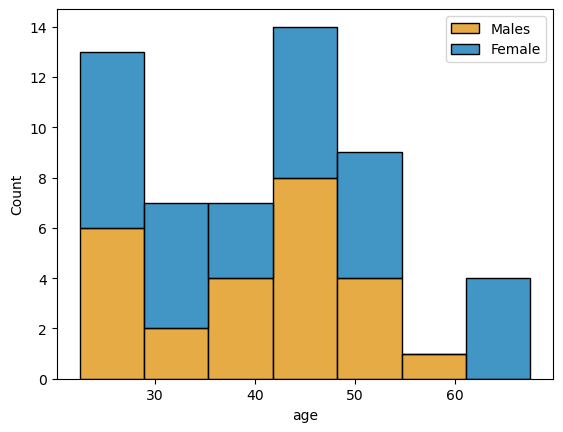

In [13]:
# Convert age ranges to numeric values (midpoints)
scores['age'] = scores['age'].apply(lambda x: int(x.split('-')[0]) + 2.5)  # Assuming midpoint for the age range

# Sort the DataFrame by the 'age' column
scores_sorted = scores.sort_values(by='age')

# Plotting
sns.histplot(data=scores_sorted, x='age', hue='gender', multiple='stack', palette='colorblind')
plt.legend(labels=['Males', 'Female'])
plt.show()

In [14]:
print(scores['age'].mean())
print(scores['age'].std())

40.86363636363637
12.249510400440704


In [15]:
scores['label'] = scores['madrs1'].notna().astype(int)

In [16]:
scores.head(5)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,label
0,condition_1,11,2,37.5,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1
1,condition_2,18,2,42.5,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,1
2,condition_3,13,1,47.5,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1
3,condition_4,13,2,27.5,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,1
4,condition_5,13,2,52.5,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,1


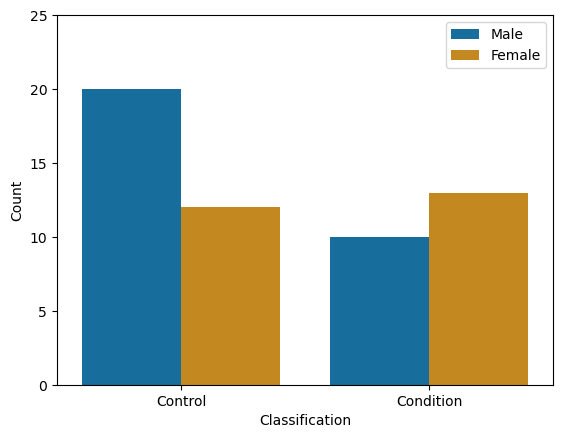

In [17]:
sns.countplot(data=scores, x = 'label', hue='gender', palette='colorblind')
plt.legend(labels=['Male', 'Female'])
plt.xticks(ticks=[0,1], labels=['Control','Condition'])
plt.xlabel('Classification')
plt.ylabel('Count')
plt.ylim(0, 25)
plt.show()

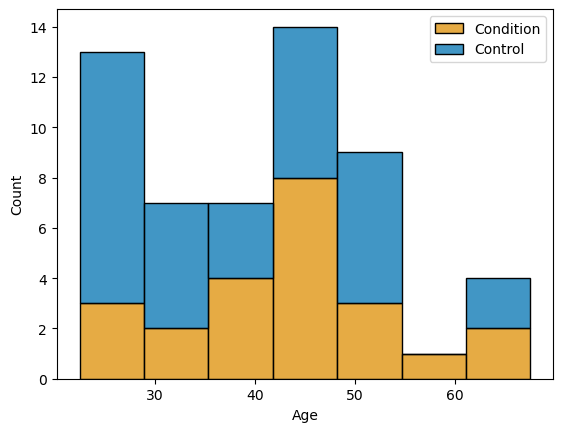

In [18]:
sns.histplot(data=scores, x = 'age', hue='label', multiple='stack', palette='colorblind')
plt.legend(labels=['Condition', 'Control'])
plt.xlabel('Age')
plt.show()

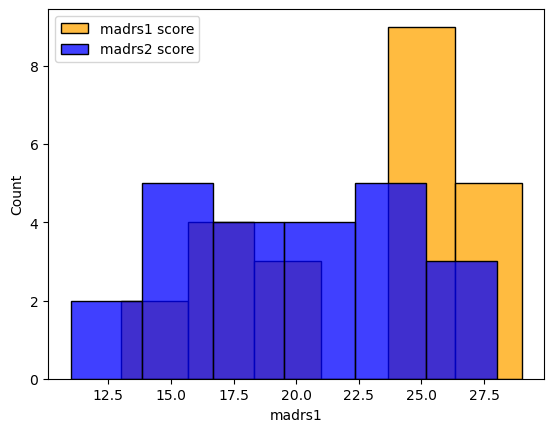

In [19]:
sns.histplot(data=scores, x = 'madrs1', multiple='stack', label="madrs1 score", color="orange")
sns.histplot(data=scores, x = 'madrs2', multiple='stack', label="madrs2 score", color = "blue")
plt.legend()
plt.show()



In [20]:
print(scores['madrs1'].mean())
print(scores['madrs2'].mean())

22.73913043478261
20.0


In [21]:
print(scores['madrs1'].skew())
print(scores['madrs2'].skew())

-0.5297431828059186
-0.0932046152041276


In [22]:
print(scores['madrs1'].std())
print(scores['madrs2'].std())

4.797891500008082
4.729020655869074


In [23]:
scores['madrs_diff']=scores['madrs1']-scores['madrs2']

In [24]:
scores.head(5)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,label,madrs_diff
0,condition_1,11,2,37.5,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1,0.0
1,condition_2,18,2,42.5,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,1,13.0
2,condition_3,13,1,47.5,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,1,-1.0
3,condition_4,13,2,27.5,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,1,4.0
4,condition_5,13,2,52.5,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,1,0.0


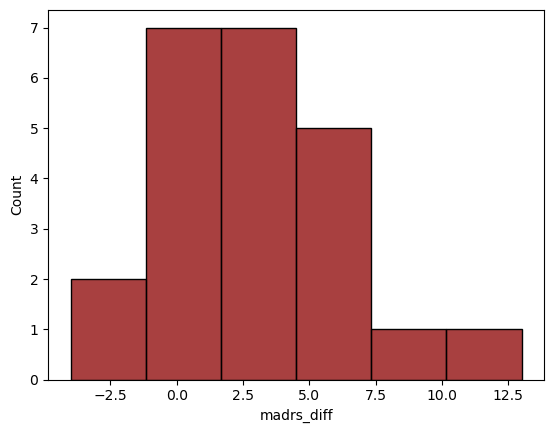

In [25]:
sns.histplot(data=scores, x = 'madrs_diff', multiple='stack', label="madrs1 score",color="darkred")
plt.show()

In [26]:
print(scores['madrs_diff'].mean())
print(scores['madrs_diff'].std())
print(scores['madrs_diff'].skew())

2.739130434782609
3.968253466340391
0.5365934413635061


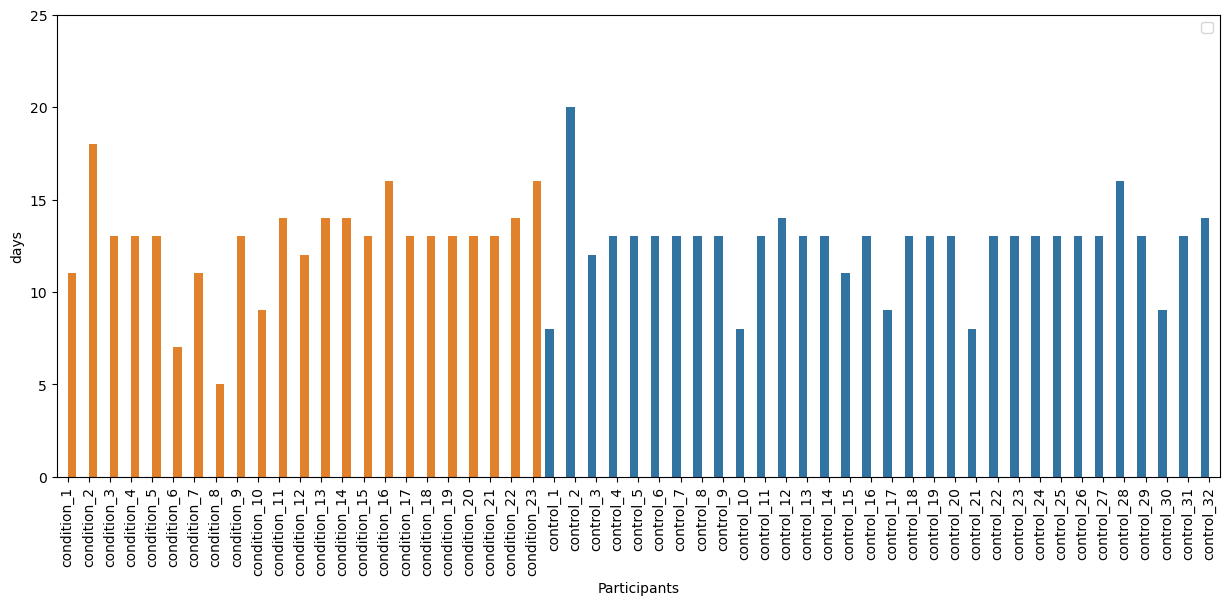

In [27]:
plt.figure(figsize=(15, 6))

sns.barplot(data=scores, x='number', y='days',hue='label')
plt.xticks(rotation=90)
plt.legend([])
plt.ylim(0, 25)
plt.xlabel('Participants')
plt.show()

In [28]:
scores.groupby('label')['days'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,32.0,12.562500,2.313181,8.0,13.0,13.0,13.0,20.0
1,23.0,12.652174,2.773391,5.0,12.5,13.0,14.0,18.0


In [29]:
df['Time'] = pd.to_datetime(df['Time'],errors='coerce').dt.time
df['Time_No'] = 100*(df['Hour']+df['Minute']/60)

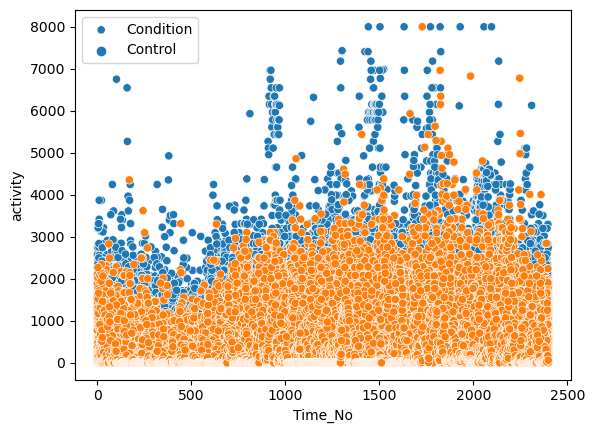

In [32]:
sns.scatterplot(data=df, x='Time_No', y='activity',hue='label')
plt.legend(labels=['Condition', 'Control'])
plt.show()

In [33]:
# merge the two files together
# total_df = pd.merge(df, scores, on=matching_headers)

In [34]:
df.head(5)

,timestamp,date,activity,id,label,Date,Year,Month,Day,Hour,Minute,Time,Time_No
0,2003-03-18 15:00:00,2003-03-18,60,control_1,0,2003-03-18,2003,March,Tuesday,15,0,NaT,1500.000000
1,2003-03-18 15:01:00,2003-03-18,0,control_1,0,2003-03-18,2003,March,Tuesday,15,1,NaT,1501.666667
2,2003-03-18 15:02:00,2003-03-18,264,control_1,0,2003-03-18,2003,March,Tuesday,15,2,NaT,1503.333333
3,2003-03-18 15:03:00,2003-03-18,662,control_1,0,2003-03-18,2003,March,Tuesday,15,3,NaT,1505.000000
4,2003-03-18 15:04:00,2003-03-18,293,control_1,0,2003-03-18,2003,March,Tuesday,15,4,NaT,1506.666667


In [38]:
Activity_data=df.drop(columns=['Time','Time_No'])

In [39]:
Activity_data.head(5)


,timestamp,date,activity,id,label,Date,Year,Month,Day,Hour,Minute
0,2003-03-18 15:00:00,2003-03-18,60,control_1,0,2003-03-18,2003,March,Tuesday,15,0
1,2003-03-18 15:01:00,2003-03-18,0,control_1,0,2003-03-18,2003,March,Tuesday,15,1
2,2003-03-18 15:02:00,2003-03-18,264,control_1,0,2003-03-18,2003,March,Tuesday,15,2
3,2003-03-18 15:03:00,2003-03-18,662,control_1,0,2003-03-18,2003,March,Tuesday,15,3
4,2003-03-18 15:04:00,2003-03-18,293,control_1,0,2003-03-18,2003,March,Tuesday,15,4


In [44]:
Activity_data.dtypes

timestamp    datetime64[ns]
date         datetime64[ns]
activity              int64
id                   object
label                 int64
Date                 object
Year                  int32
Month                object
Day                  object
Hour                  int32
Minute                int32
dtype: object